In [ ]:
import torch
from diffusers import AnimateDiffPipeline, MotionAdapter, EulerDiscreteScheduler
from diffusers.utils import export_to_gif
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
from IPython.display import display, Image

device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if torch.cuda.is_available() else torch.float32  # Adjust dtype for compatibility

# Define model parameters
step = 4  # Options: [1,2,4,8]
repo = "ByteDance/AnimateDiff-Lightning"
ckpt = f"animatediff_lightning_{step}step_diffusers.safetensors"
base = "emilianJR/epiCRealism"

# Load motion adapter
adapter = MotionAdapter().to(device, dtype)
adapter.load_state_dict(load_file(hf_hub_download(repo, ckpt), device=device))

# Load pipeline
pipe = AnimateDiffPipeline.from_pretrained(base, motion_adapter=adapter, torch_dtype=dtype).to(device)
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", beta_schedule="linear")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/4 [00:00<?, ?it/s]

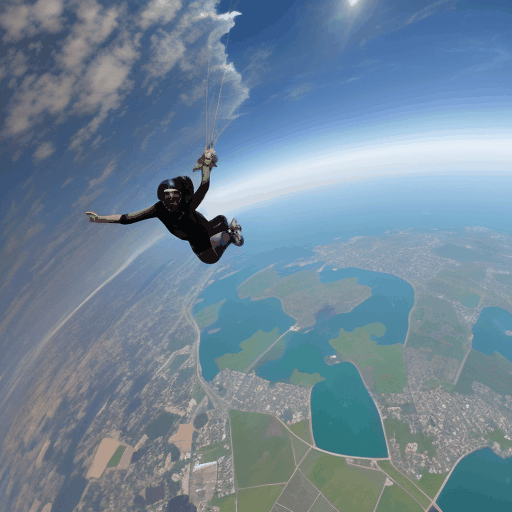

In [ ]:
# Generate animation
output = pipe(prompt="A Person Skydiving", guidance_scale=1.0, num_inference_steps=step)

gif_path = "animation.gif"
export_to_gif(output.frames[0], gif_path)

display(Image(filename=gif_path))